In [2]:
import numpy as np
import scipy.linalg
import math
import sys
import matplotlib.pyplot as plt

The following gives us the spectrum of effective continuum hamiltonians by truncating to finite-dimensional matrices. Set `trunc_dim` to the dimension of matrices we work with (50 seems to work fine).

In [3]:
trunc_dim = 50

In [4]:
#initialize hamiltonian with zeroes
ham = np.matrix(np.zeros(shape=(trunc_dim,trunc_dim)),dtype=complex)
# Landau hamiltonian
h0 = np.diag(np.arange(trunc_dim)+0.5)
# squared ladder operators
f = np.vectorize(lambda x: math.sqrt(x*(x-1)))
g = np.vectorize(lambda x: math.sqrt((x+1)*(x+2)))
a2 = np.diag(f(np.arange(2,trunc_dim)),-2)
at2 = np.diag(g(np.arange(trunc_dim-2)),2)
# squared momenta
px2 = h0 + 0.5*(a2+at2)
py2 = h0 - 0.5*(a2+at2)

Let's add some functions that give us $p_x^{2n}$ and $p_y^{2n}$ recursively and store previous results

In [5]:
# returns matrix rep of px^(2n) using memoization to store results.
px2n_table = [0,px2]
def px2n(n):
    if(len(px2n_table)>n):
        return px2n_table[n]
    else:
        temp = px2n(n-1)@px2
        px2n_table.append(temp)
        return temp
    
# matrix rep of py^(2n)
py2n_table = [0,py2]
def py2n(n):
    if(len(py2n_table)>n):
        return py2n_table[n]
    else:
        temp = py2n(n-1)@py2
        py2n_table.append(temp)
        return temp

Now we implement the hamiltonian $H_{\text{eff}}^{(n)} = \frac{1}{2n}\left(\pi_x^{2n} + \pi_y^{2n}\right)$

In [6]:
def p_power_Heff(n):
    return 0.5*(1/n)*(px2n(n) + py2n(n))

Let's check against diagp4x4.py

In [7]:
q_evals,q_evecs =scipy.linalg.eigh(p_power_Heff(2))
q_evals.sort()
print(q_evals)
print(q_evecs[0])

[3.49182058e-01 1.78288219e+00 4.66009571e+00 8.96475589e+00
 1.47065824e+01 2.18841318e+01 3.04972981e+01 4.05460351e+01
 5.20303278e+01 6.49501693e+01 7.93055562e+01 9.50964865e+01
 1.12322959e+02 1.30984974e+02 1.51082529e+02 1.72615626e+02
 1.95584263e+02 2.19988441e+02 2.45828159e+02 2.73103418e+02
 3.01814216e+02 3.31960554e+02 3.63542446e+02 3.96559870e+02
 4.31012710e+02 4.66901170e+02 5.04226108e+02 5.42985942e+02
 5.83174037e+02 6.24802890e+02 6.67909624e+02 7.12419881e+02
 7.58105107e+02 8.05429450e+02 8.55290618e+02 9.05684997e+02
 9.52340380e+02 1.00479785e+03 1.07374033e+03 1.13095643e+03
 1.14820277e+03 1.20486307e+03 1.35631160e+03 1.38535970e+03
 1.42296402e+03 1.45127368e+03 1.78810564e+03 1.79762276e+03
 1.86860254e+03 1.87800575e+03]
[ 9.99103827e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.22962774e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.60094539e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.33675895e-05  0.00000000e+00  0.00000

eigenvalues from diagp4x4.py

`0.3491820576155325
1.7828821912914439
4.660095710206393
8.964755892189805
14.706582361935856
21.884131837593063
30.497298074110535
40.54603514095913
52.03032780813033
64.95016928691517
79.30555615896394
95.09648653277529`

(nonzero, $n=4k$) ground state coefficients from diagp4x4.py

`0.9991038273737545
-0.04229627736471448
0.0016009453949407135
-6.336758953249004e-05
2.5655436479782725e-06
-1.0527365040419397e-07
4.358188336490413e-09`

Compute the trace inequality for the single-particle ground state

In [8]:
def tr_inequality(n):
    val,vec = scipy.linalg.eigh(p_power_Heff(n))
    return 2*np.sum(np.multiply(np.square(vec[0]),np.arange(trunc_dim)))
    

In [9]:
tr_inequality(1)

0.0

In [10]:
tr_inequality(2)

0.014352905631726493

In [11]:
tr_inequality(3)

0.015358329782345855

Plot $\langle T\rangle(n)$ for ground state of $H_{\text{eff}}^{(n)}$

In [12]:
tr_table=np.vectorize(tr_inequality)(np.arange(1,17))

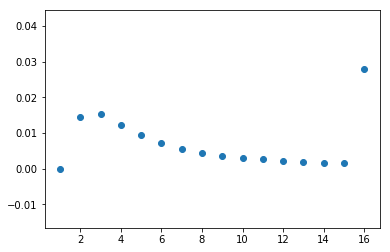

In [13]:
plt.scatter(np.arange(1,17),tr_table)
plt.show()

Seems like it works up to n=15, then goes off the rails...

In [14]:
tr_table

array([0.        , 0.01435291, 0.01535833, 0.01223203, 0.00933058,
       0.00717697, 0.00563049, 0.00451052, 0.0036841 , 0.0030619 ,
       0.00258455, 0.00221284, 0.00191874, 0.00169169, 0.00149484,
       0.02779815])